In [6]:
import pandas as pd
import sklearn
import math
from textblob import TextBlob as tb

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Yitao
[nltk_data]     Yu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Yitao
[nltk_data]     Yu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

In [ ]:
#remove repeated post for each day? #
#replace "":;''.,><()*&^%$#@!?`~\|-_=+ with space#
#split by " "#
#remove stop words#
#Apriori: min_sup 0.05, length = 2#
#remove some of those#
#Apriori: min_sup 0.01,length = 3#

In [37]:
files = []
for i in range(14,28):
    #if i < 10 do str(str(0)+str(i))#
    name = "hot2020-04-"+str(i)+".csv"
    files.append(name)
dflist = []
datelist = []
for i in files:
    df = pd.read_csv(i)
    dflist.append(df)
    datelist.append(i[3:-4])

In [68]:
#tf-idf: finding the most important words throughout different documents#
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

def extractwords(bloblist,stopwords):
    #stopwords are supposed to be a python list of words, do not use nltk's stopwords directly#
    words = {}
    for i, blob in enumerate(bloblist):
        #remember i for identifying documents#
        scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
        sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        words.update({str(i):sorted_words[:20]})
        for word in sorted_words[:15]:
            stopwords.append(word[0])
    return words,stopwords

In [69]:
def mergetext(dflist, stopwords):
    from nltk.tokenize import word_tokenize 
    #stopwords are a list of words you would want to get rid of#
    subreddits = ['CoronavirusUS','CoronavirusUK','CoronavirusNewYork','CoronavirusCA','Talk about Coronavirus in Michigan ','CoronaVirusPA','CoronavirusIllinois']
    bloblist = []
    for i in subreddits:
        bloblist.append(" ")
    for i in range(0,len(dflist)):
        for j,row in dflist[i].iterrows():
            k = subreddits.index(row["subreddit"])
            if(k<0):
                print("mergetext: Can't find subreddits index:"+row["subreddit"])
                continue
            word_tokens = word_tokenize(row["title"]) 
            filtered_sentence = [w for w in word_tokens if not w in stopwords] 
            string = " "
            string = string.join(filtered_sentence)
            bloblist[k] = str(bloblist[k]) + string
    return bloblist

In [80]:
#do extract words twice, the second time with an updated stop word lst#
######
stopwordslist = []
for i in set(stopwords.words('english')):
    stopwordslist.append(i)
blist = mergetext(dflist,stopwordslist)
bloblist = []
for i in blist:
    bloblist.append(tb(i))
words,stopwordslist = extractwords(bloblist,stopwordslist)
######
blist = mergetext(dflist,stopwordslist)
bloblist = []
for i in blist:
    bloblist.append(tb(i))
newwords,stopwordslist = extractwords(bloblist,stopwordslist)

In [81]:
words

{'0': [('Ask', 0.002876802710309504),
  ('Answer', 0.002876802710309504),
  ('DAILY', 0.002876802710309504),
  ('GET', 0.002707579021467768),
  ('Q', 0.002538355332626033),
  ('Said', 0.0020306842661008263),
  ('Wear', 0.0020306842661008263),
  ('APRIL', 0.0020306842661008263),
  ('Says', 0.001889827731782462),
  ('Come', 0.0018614605772590907),
  ('Make', 0.0018312529739558635),
  ('America', 0.0017167996630836223),
  ('AND', 0.0016922368884173553),
  ('HELP', 0.0016922368884173553),
  ('Tests', 0.0016630484039685666),
  ('Disinfectant', 0.0015230131995756196),
  ('South', 0.0014878930413391393),
  ('Reopen', 0.0013635238550096431),
  ('NOT', 0.001353789510733884),
  ('YOUR', 0.001353789510733884),
  ('BETTER', 0.001353789510733884),
  ('Month', 0.001353789510733884),
  ('Testing', 0.0012850828576120741),
  ('Go', 0.0012589864195946562),
  ('Amid', 0.0012589864195946562),
  ('UPDATE', 0.0012589864195946562),
  ('Even', 0.0012589864195946562),
  ('See', 0.0011845658218921486),
  ('Else

In [82]:
newwords

{'0': [('Year', 0.0012429965668983099),
  ('Federal', 0.0012429965668983099),
  ('Away', 0.0012429965668983099),
  ('percent', 0.0012009891713496864),
  ('Death', 0.0011446256100509013),
  ('Getting', 0.0011105061702474722),
  ('Weeks', 0.0011105061702474722),
  ('experts', 0.0010808902542147178),
  ('Life', 0.0010808902542147178),
  ('Toll', 0.0010808902542147178),
  ('THEY', 0.00106542562876998),
  ('Arizona', 0.00106542562876998),
  ('Risk', 0.00106542562876998),
  ('Stop', 0.00106542562876998),
  ('Known', 0.00106542562876998),
  ('Asked', 0.00106542562876998),
  ('Week', 0.0010311843009440814),
  ('People', 0.0010050930222613584),
  ('states', 0.0010015474087945388),
  ('Symptoms', 0.000960791337079749),
  ('Without', 0.000960791337079749),
  ('covid19', 0.000960791337079749),
  ('Nation', 0.000960791337079749),
  ('Calls', 0.000960791337079749),
  ('Coming', 0.000960791337079749),
  ('Patients', 0.000906161941290297),
  ('HereList', 0.00088785469064165),
  ('Telehealth/Virtual', 

In [ ]:
#####################
#After Manually Labeling
#####################

In [155]:
precaution_words = ['ventilators','quarantine','mask','hotspot','wear', 'tests', 'test', 'disinfectant','testing','death','deaths','life','lives','risk','symptoms','symptom','patients','lockdown','shutdown','ppe','extended','cuomo','died','quarantine','extends','coverings','deadliest','wayne','rapids','capacity','shutdown','flatten','executive','senior','wolf','stay-at-home','tested']
concerns_words = ['economy','economist','reopen','parade','protest','marriage','homeless','loan','food','foods','unemployed','unemployment','homeless']

subreddits = ['CoronavirusUS','CoronavirusUK','CoronavirusNewYork','CoronavirusCA','Talk about Coronavirus in Michigan ','CoronaVirusPA','CoronavirusIllinois']

In [156]:
files = []
for i in range(14,29):
    #if i < 10 do str(str(0)+str(i))#
    if i == 21:
        continue
    name = "hot2020-04-"+str(i)+".csv"
    files.append(name)
files.append("hot2020-04-30.csv")
files.append("hot2020-05-01.csv")
files.append("hot2020-05-02.csv")
files.append("hot2020-05-03.csv")
dflist = []
datelist = []
for i in files:
    df = pd.read_csv(i)
    dflist.append(df)
    datelist.append(i[3:-4])

In [157]:
from nltk.tokenize import word_tokenize 
for i in range(0,len(dflist)):
    df = dflist[i]
    label_precaution = []
    label_concerns = []
    for j,row in dflist[i].iterrows():
        tokens = word_tokenize(row["title"])
        
        tokens = [w.lower() for w in tokens ] 
        
        label = [0,0]
        for m in precaution_words: 
            if m in tokens:
                label[0] = 1
                break
        for n in concerns_words:
            if n in tokens:
                label[1] = 1
                break
        label_precaution.append(label[0])
        label_concerns.append(label[1])
    df['precaution'] = label_precaution
    df['concerns'] = label_concerns

In [158]:
#saving to csv#
for i in range(0,len(dflist)):
    df = dflist[i]
    df.to_csv("./Labeled/"+"labeled"+datelist[i])

In [159]:
def media_feature(df):
    subreddits = ['CoronavirusUS','CoronavirusUK','CoronavirusNewYork','CoronavirusCA','Talk about Coronavirus in Michigan ','CoronaVirusPA','CoronavirusIllinois']
    pre = []
    concerns = []
    non = []
    for i in subreddits:
        pre.append(0)
        concerns.append(0)
        non.append(0)
    for i,row in df.iterrows():
        k = subreddits.index(row["subreddit"])
        if(row["precaution"] == 1):
            pre[k] += 1
        if(row["concerns"] == 1):
            concerns[k] += 1
        if(row["precaution"] == 0) and (row["concerns"] == 0):
            non[k] += 1
    return pre,concerns,non

In [160]:
P = []
C = []
for i in subreddits:
    P.append([])
    C.append([])
for df in dflist:
    pre,concerns,non = media_feature(df)
    for i in range(0,len(pre)):
        P[i].append(float(pre[i]+1)/float(pre[i]+concerns[i]+non[i]+1))
        C[i].append(float(concerns[i]+1)/float(pre[i]+concerns[i]+non[i]+1))

In [175]:
datelist

['2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03']

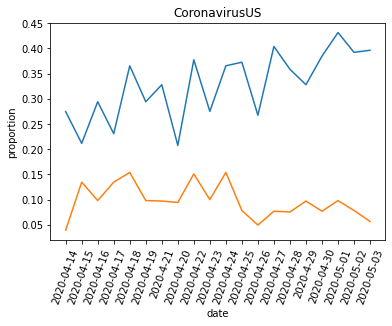

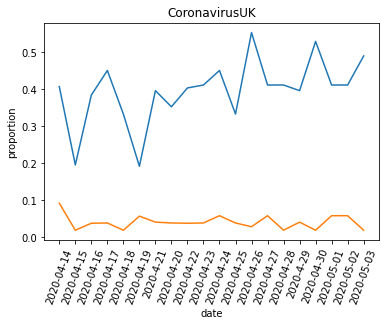

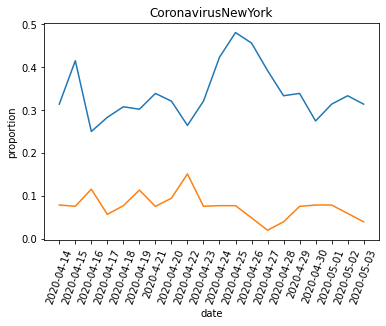

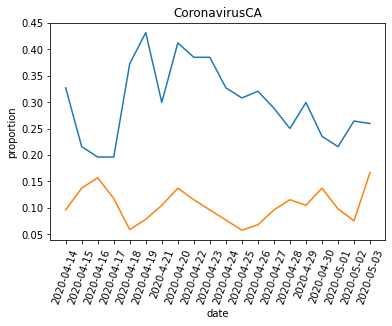

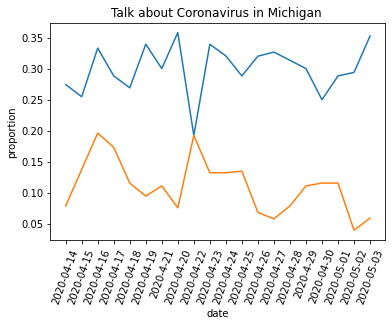

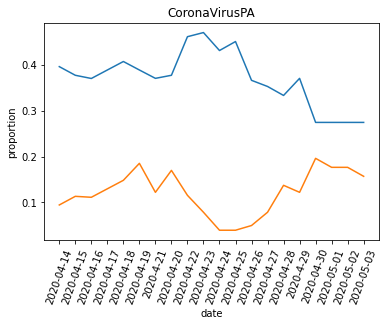

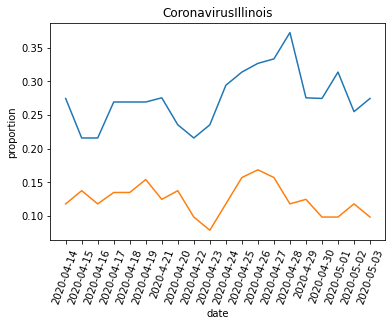

In [180]:
import matplotlib
from matplotlib import pyplot as plt
Pplots = []
Cplots = []
plotlist = []
for j in range(0,len(subreddits)):
    dic = {"date":datelist.copy(),"P":P[j].copy(),"C":C[j].copy()}
    k1 = 6
    k2 = 13+2
    dic.get("date").insert(k1,"2020-4-21")
    dic.get("date").insert(k2,"2020-4-29")
    dic.get("P").insert(k1,sum(P[j])/len(P[j]))
    dic.get("C").insert(k1,sum(C[j])/len(C[j]))
    dic.get("P").insert(k2,sum(P[j])/len(P[j]))
    dic.get("C").insert(k2,sum(C[j])/len(C[j]))
    datel = dic.get("date")
    
    from matplotlib import dates
    import datetime
    converted_dates = list(map(datetime.datetime.strptime, datelist, len(datelist)*['%Y-%m-%d']))
    x_axis = converted_dates
    formatter = dates.DateFormatter('%Y-%m-%d')
    
    fig,ax = plt.subplots()
    plt.xticks(rotation=70)
    ax.set_xlabel("date")
    ax.set_ylabel("proportion")
    ax.plot(datel,dic.get("P"))
    ax.plot(datel,dic.get("C"))
    ax.title.set_text(subreddits[j])
    plt.show()